In [26]:
folder_path = 'raw_data'
response_type = 'similarity'

In [27]:
import os
import pickle as pkl
import sys
import numpy as np
import pandas as pd
import sklearn
import csv
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS
import seaborn as sns
import ot
import plotly.graph_objs as go
import plotly.express as px
from mpl_toolkits.axes_grid1 import make_axes_locatable
import utilityFunctions
print(sys.path)
from itertools import combinations

['/Users/kanamatsuyanagi/anaconda3/envs/GWOT/lib/python312.zip', '/Users/kanamatsuyanagi/anaconda3/envs/GWOT/lib/python3.12', '/Users/kanamatsuyanagi/anaconda3/envs/GWOT/lib/python3.12/lib-dynload', '', '/Users/kanamatsuyanagi/anaconda3/envs/GWOT/lib/python3.12/site-packages']


In [28]:
# Define unique colors
# TODO - remove after confirming that it is no longer needed (replaced by function)
unique_colours = np.array(['#d2b700', '#db8b08', '#c7512c', '#c13547', '#a03663', '#753a7a', '#4b488e', '#005692', '#006a8b', '#007b75', '#008a52', '#9aa400'])
colour_index = {colour: idx for idx, colour in enumerate(unique_colours)}
matrix_size = len(unique_colours)

# Provides dictionary of colours, with an assigned id for each colour
# OUTPUTS:
#   colour_index: dictionary, {colour_string : colour_id}
def getUniqueColours():
    unique_colours = np.array(['#d2b700', '#db8b08', '#c7512c', '#c13547', '#a03663', '#753a7a', '#4b488e', '#005692', '#006a8b', '#007b75', '#008a52', '#9aa400'])
    colour_index = {colour: idx for idx, colour in enumerate(unique_colours)}
    return colour_index

### configuration
n_eps = 15 # number of epsilon values tried
eps_range = [0.04, 5] # the range of epsilon searched
epsilons = np.logspace(np.log10(eps_range[0]), np.log10(eps_range[1]), n_eps) # epsilon values

In [29]:
# Create matrix
matrix_1 = np.zeros((matrix_size, matrix_size))
matrix_2 = np.zeros((matrix_size, matrix_size))

# Load the second CSV file
df_PM1 = pd.read_csv('raw_data/202411_data/5a9b20c535237b0001129820_kana_colourPreferenceQualia_2024-11-14_03h40.27.980.csv')
# Apply filters
df_PM1 = df_PM1[(df_PM1['practice_trial'] != 1) & (df_PM1['response_type'] == response_type)]

# Extract columns
colour1_1 = df_PM1['colour1']
colour2_1 = df_PM1['colour2']
target_preference_1 = df_PM1['response']

# Fill the matrix
for c1, c2, tp in zip(colour1_1, colour2_1, target_preference_1):
    I = colour_index[c1]
    j = colour_index[c2]
    matrix_1[I, j] = tp

# Convert the matrix to integers
matrix_1 = matrix_1.astype(int)

# Load the second CSV file
df_PM2 = pd.read_csv('raw_data/202411_data/5eb05d66438b180fe44f6929_kana_colourPreferenceQualia_2024-11-13_22h37.20.028.csv')
df_PM2 = df_PM2[(df_PM2['practice_trial'] != 1) & (df_PM2['response_type'] == response_type)]
# Extract columns
colour1_2 = df_PM2['colour1']
colour2_2 = df_PM2['colour2']
target_preference_2 = df_PM2['response']

# Fill the matrix
for c1, c2, tp in zip(colour1_2, colour2_2, target_preference_2):
    I = colour_index[c1]
    j = colour_index[c2]
    matrix_2[I, j] = tp

# Convert the matrix to integers
matrix_2 = matrix_2.astype(int)

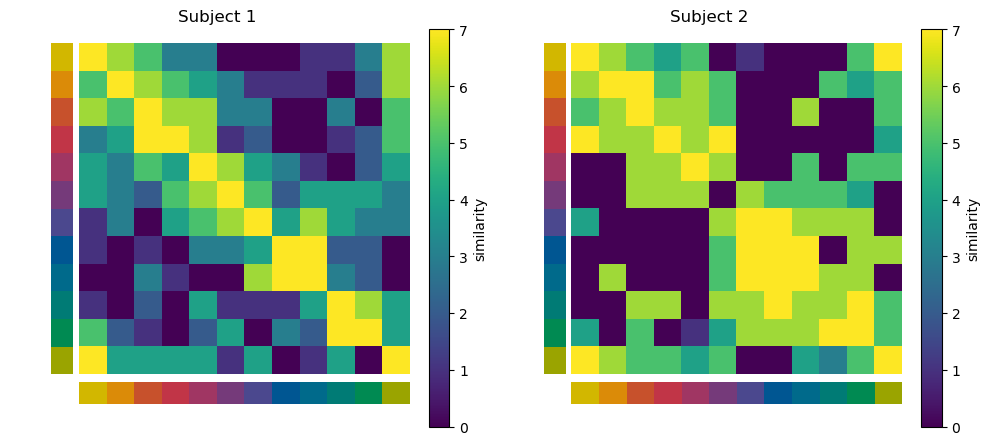

In [30]:
utilityFunctions.show_heatmaps(0, 7, matrices=[matrix_1, matrix_2], titles=['Subject 1', 'Subject 2'], cbar_label="similarity", color_labels=unique_colours)

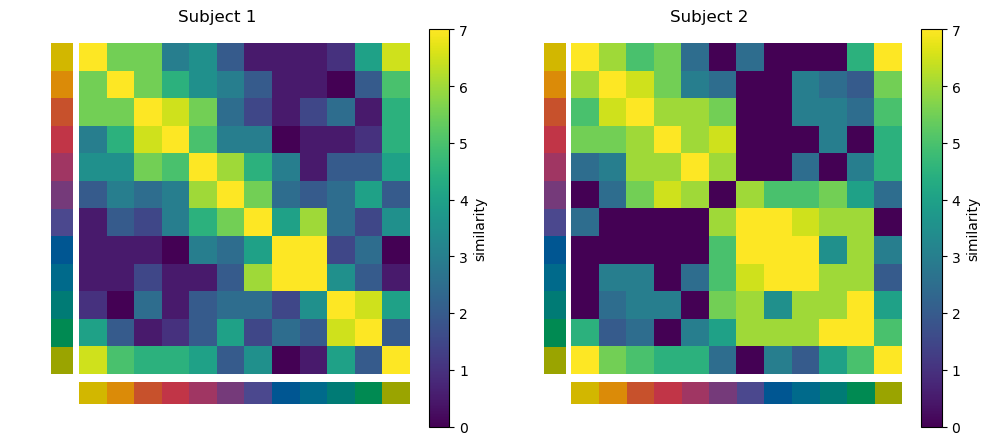

In [31]:
distance_matrix_1 = utilityFunctions.compute_color_similarity_distance_matrix(matrix_1)
distance_matrix_2 = utilityFunctions.compute_color_similarity_distance_matrix(matrix_2)
utilityFunctions.show_heatmaps(0, 7, matrices=[distance_matrix_1, distance_matrix_2], titles=['Subject 1', 'Subject 2'], cbar_label="similarity", color_labels=unique_colours)

RSA correlation coefficient :  0.9999999999999998


/Users/kanamatsuyanagi/anaconda3/envs/GWOT/lib/python3.12/site-packages/ot/bregman/_sinkhorn.py:631: RuntimeWarning: divide by zero encountered in divide
  v = b / KtransposeU
/Users/kanamatsuyanagi/anaconda3/envs/GWOT/lib/python3.12/site-packages/ot/bregman/_sinkhorn.py:643: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn("Warning: numerical errors at iteration %d" % ii)
/Users/kanamatsuyanagi/anaconda3/envs/GWOT/lib/python3.12/site-packages/ot/gromov/_bregman.py:245: UserWarning: Solver failed to produce a transport plan. You might want to increase the regularization parameter `epsilon`.
  warnings.warn(
/Users/kanamatsuyanagi/anaconda3/envs/GWOT/lib/python3.12/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


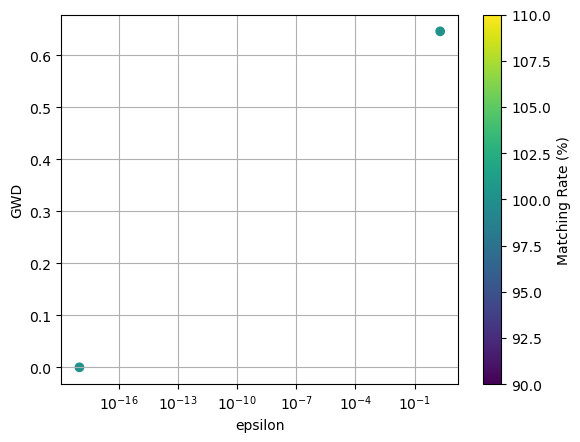

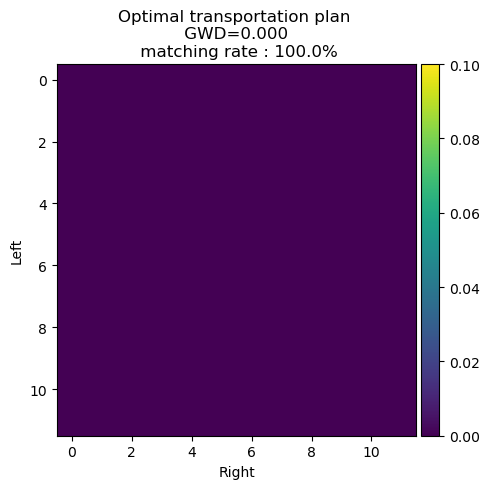

0.0
Equal to zero


In [36]:
RSA_corr = utilityFunctions.RSA(matrix_1, matrix_1)
print('RSA correlation coefficient : ', RSA_corr)
eps_range = [0.000000000000000001, 2]   
epsilons = np.logspace(np.log10(eps_range[0]), np.log10(eps_range[1]), 2)
OT_plan_as, gwds_as, matching_rates_as = utilityFunctions.GWD_and_plot(matrix_1, matrix_1, epsilons)
print(min(gwds_as))

Check each OT plan if it only contains zero.
If it does, that is a erroneous OT plan so check the next smallest gwd value.

In [33]:
RSA_corr = utilityFunctions.RSA(matrix_1, matrix_2)
print('RSA correlation coefficient : ', RSA_corr)
eps_range = [1, 2]   
epsilons = np.logspace(np.log10(eps_range[0]), np.log10(eps_range[1]), n_eps)
OT_plan_as, gwds_as, matching_rates_as = utilityFunctions.GWD_and_plot(matrix_1, matrix_2, epsilons)

RSA correlation coefficient :  0.6124736726717039


KeyboardInterrupt: 

RSA correlation coefficient :  0.6503735551355814


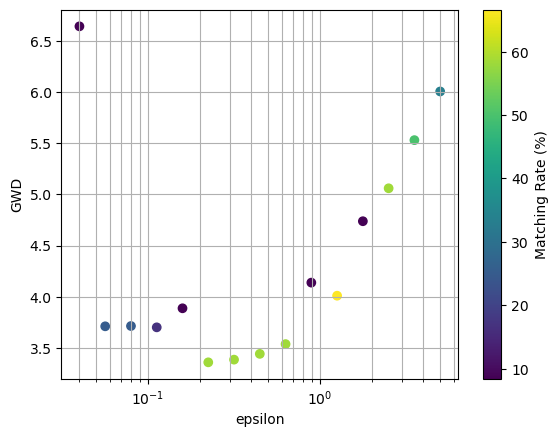

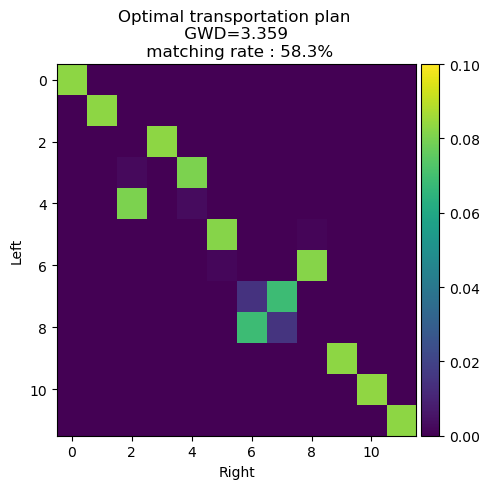

In [ ]:
RSA_corr = utilityFunctions.RSA(distance_matrix_1, distance_matrix_2)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_sym, gwds_sym, matching_rates_sym = utilityFunctions.GWD_and_plot(distance_matrix_1, distance_matrix_2, epsilons)